#Team 9 : Food Recommendation Classification

In [ ]:
import sklearn
print(sklearn.__version__)

1.2.2


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib

##Mendapatkan Data

In [ ]:
#dataset user
!gdown https://drive.google.com/uc?id=1-zmQKKgDx7gCjm7HpiT6vU3qgN4kmerC

#dataset makanan
!gdown https://drive.google.com/uc?id=1oxGrPoh2U0UAi70-v2Trh09sW94jWHWa

#dataset rekomendasi
!gdown https://drive.google.com/uc?id=1YCgu9J4dWPoyRJHeqQLNTc8aVP_IO_Hh

Downloading...
From: https://drive.google.com/uc?id=1-zmQKKgDx7gCjm7HpiT6vU3qgN4kmerC
To: /content/data_user.csv
100% 3.38k/3.38k [00:00<00:00, 15.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1oxGrPoh2U0UAi70-v2Trh09sW94jWHWa
To: /content/data_makanan.csv
100% 8.76k/8.76k [00:00<00:00, 21.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1YCgu9J4dWPoyRJHeqQLNTc8aVP_IO_Hh
To: /content/data_rekomendasi.csv
100% 174k/174k [00:00<00:00, 74.8MB/s]


In [ ]:
user_df = pd.read_csv("/content/data_user.csv")
makanan_df = pd.read_csv("/content/data_makanan.csv")
rekomendasi_df = pd.read_csv("/content/data_rekomendasi.csv")

##Eksplorasi Data

In [ ]:
user_df.head()

,id_user,Usia,Jenis Kelamin,Tinggi (cm),Berat (kg),Kondisi Kesehatan
0,1,56,Wanita,181,56,Radang Sendi
1,2,69,Wanita,153,65,Radang Sendi
2,3,46,Wanita,179,75,Radang Sendi
3,4,32,Wanita,186,97,Radang Sendi
4,5,60,Pria,172,98,Radang Sendi


In [ ]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id_user            105 non-null    int64 
 1   Usia               105 non-null    int64 
 2   Jenis Kelamin      105 non-null    object
 3   Tinggi (cm)        105 non-null    int64 
 4   Berat (kg)         105 non-null    int64 
 5   Kondisi Kesehatan  105 non-null    object
dtypes: int64(4), object(2)
memory usage: 5.0+ KB


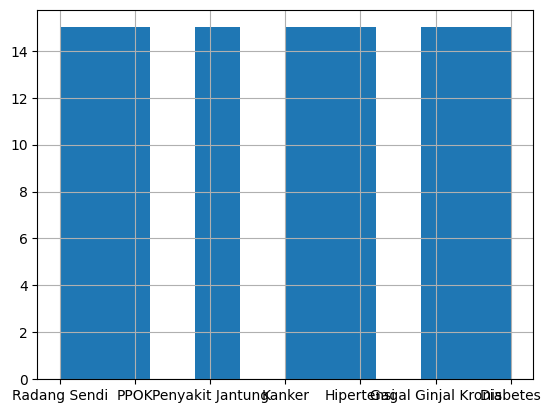

In [ ]:
user_df['Kondisi Kesehatan'].hist()
plt.show()

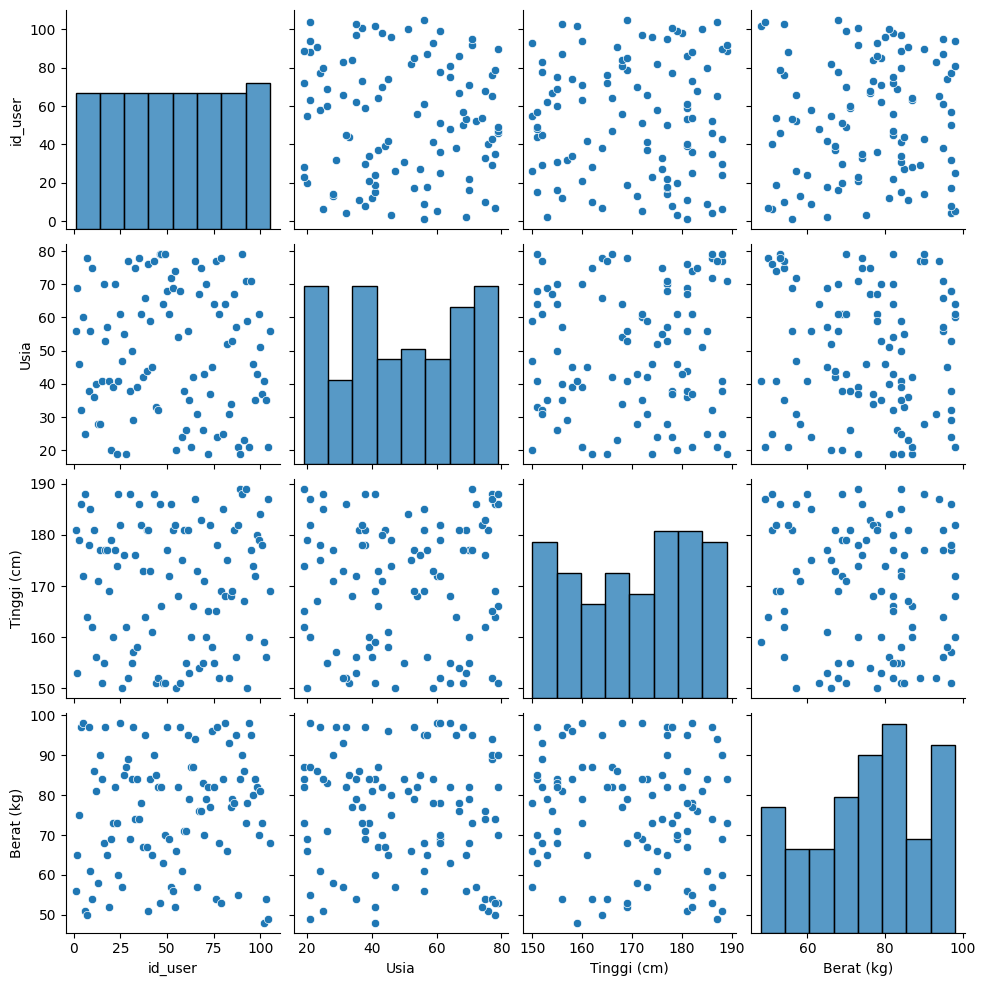

In [ ]:
sns.pairplot(user_df)
plt.show()

In [ ]:
makanan_df.head()

,id_makanan,nama_makanan,kategori,Gagal Jantung,Diabetes,Hipertensi,Penyakit Jantung,PPOK,Kanker,Gagal Ginjal Kronis,Radang Sendi
0,1,Apel,buah,boleh,boleh,boleh,boleh,boleh,boleh,boleh,boleh
1,2,Pisang,buah,boleh,boleh,boleh,boleh,boleh,boleh,boleh,boleh
2,3,Jeruk,buah,boleh,boleh,boleh,boleh,boleh,boleh,boleh,boleh
3,4,Anggur,buah,boleh,boleh,boleh,boleh,boleh,boleh,boleh,boleh
4,5,Mangga,buah,boleh,boleh,boleh,boleh,boleh,boleh,boleh,boleh


In [ ]:
makanan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id_makanan           100 non-null    int64 
 1   nama_makanan         100 non-null    object
 2   kategori             100 non-null    object
 3   Gagal Jantung        100 non-null    object
 4   Diabetes             100 non-null    object
 5   Hipertensi           100 non-null    object
 6   Penyakit Jantung     100 non-null    object
 7   PPOK                 100 non-null    object
 8   Kanker               100 non-null    object
 9   Gagal Ginjal Kronis  100 non-null    object
 10  Radang Sendi         100 non-null    object
dtypes: int64(1), object(10)
memory usage: 8.7+ KB


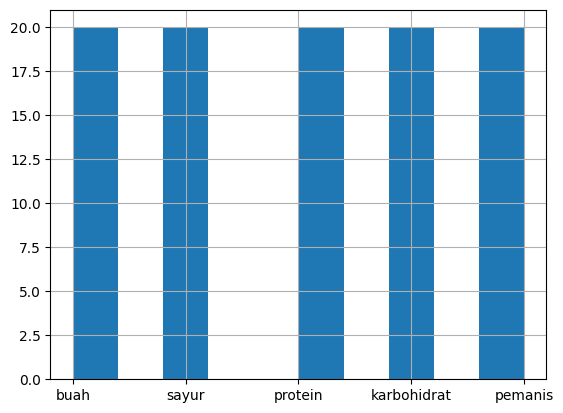

In [ ]:
makanan_df['kategori'].hist()
plt.show()

In [ ]:
rekomendasi_df.head()

,id_user,id_makanan,rekomendasi
0,1,1,allowed
1,1,2,allowed
2,1,3,allowed
3,1,4,allowed
4,1,5,allowed


In [ ]:
rekomendasi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10500 entries, 0 to 10499
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id_user      10500 non-null  int64 
 1   id_makanan   10500 non-null  int64 
 2   rekomendasi  10500 non-null  object
dtypes: int64(2), object(1)
memory usage: 246.2+ KB


##Preprocessing Data

In [ ]:
 # Buat kamus pemetaan kondisi kesehatan ke nilai integer
kondisi_kesehatan_mapping = {
    'Gagal Jantung': 0,
    'Diabetes': 1,
    'Hipertensi': 2,
    'Penyakit Jantung': 3,
    'PPOK': 4,
    'Kanker': 5,
    'Gagal Ginjal Kronis': 6,
    'Radang Sendi': 7
}

# Menggunakan kamus untuk mengubah nilai pada kolom Kondisi Kesehatan
user_df['Kondisi Kesehatan'] = user_df['Kondisi Kesehatan'].map(kondisi_kesehatan_mapping)
user_df['Jenis Kelamin'] = user_df['Jenis Kelamin'].map({'Pria': 1, 'Wanita': 0})
rekomendasi_df['rekomendasi'] = rekomendasi_df['rekomendasi'].replace({'allowed': 1, 'not allowed': 0})

# Menggabungkan data rekomendasi dengan data pengguna dan data makanan
merged_df = rekomendasi_df.merge(user_df, on='id_user').merge(makanan_df, on='id_makanan')

# Mengatur urutan kolom sesuai yang diminta
final_df = merged_df[['Usia', 'Jenis Kelamin', 'Tinggi (cm)', 'Berat (kg)', 'Kondisi Kesehatan',
                      'id_makanan', 'nama_makanan', 'kategori', 'rekomendasi']]

final_df

,Usia,Jenis Kelamin,Tinggi (cm),Berat (kg),Kondisi Kesehatan,id_makanan,nama_makanan,kategori,rekomendasi
0,56,0,181,56,7,1,Apel,buah,1
1,69,0,153,65,7,1,Apel,buah,1
2,46,0,179,75,7,1,Apel,buah,1
3,32,0,186,97,7,1,Apel,buah,1
4,60,1,172,98,7,1,Apel,buah,1
...,...,...,...,...,...,...,...,...,...
10495,37,1,178,73,1,100,Dextrose,pemanis,0
10496,41,0,159,48,1,100,Dextrose,pemanis,0
10497,35,0,156,54,7,100,Dextrose,pemanis,0
10498,21,1,187,49,6,100,Dextrose,pemanis,0


##Pelatihan Model

In [ ]:
# Memisahkan fitur dan target
X = final_df[['Usia', 'Jenis Kelamin', 'Tinggi (cm)', 'Berat (kg)', 'Kondisi Kesehatan', 'id_makanan']]
y = final_df['rekomendasi']

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine (SVM)": SVC(kernel='linear', random_state=42),
    "K-Nearest Neighbors (KNN)": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB()
}

In [ ]:
# Melatih dan mengevaluasi setiap model
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy
    print(f"{model_name}: Accuracy = {accuracy:.2f}")

Logistic Regression: Accuracy = 0.83
Random Forest: Accuracy = 0.89
Gradient Boosting: Accuracy = 0.98
Support Vector Machine (SVM): Accuracy = 0.84
K-Nearest Neighbors (KNN): Accuracy = 0.87
Naive Bayes: Accuracy = 0.81


In [ ]:
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"\nModel: {model_name}")
    print(f"Accuracy: {accuracy}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))


Model: Logistic Regression
Accuracy: 0.8285714285714286
Confusion Matrix:
[[ 687  184]
 [ 176 1053]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.79      0.79       871
           1       0.85      0.86      0.85      1229

    accuracy                           0.83      2100
   macro avg       0.82      0.82      0.82      2100
weighted avg       0.83      0.83      0.83      2100


Model: Random Forest
Accuracy: 0.8942857142857142
Confusion Matrix:
[[ 756  115]
 [ 107 1122]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.87       871
           1       0.91      0.91      0.91      1229

    accuracy                           0.89      2100
   macro avg       0.89      0.89      0.89      2100
weighted avg       0.89      0.89      0.89      2100


Model: Gradient Boosting
Accuracy: 0.9752380952380952
Confusion Matrix:
[[ 819   52]
 [   0 1229]]
Cl

In [ ]:
# Mencari model dengan akurasi tertinggi
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]

print(best_model)

GradientBoostingClassifier(random_state=42)


In [ ]:
# Menyimpan model dengan akurasi tertinggi
joblib.dump(best_model, 'best_model.pkl')
print("Model saved")

Model saved


##Pengujian dengan data baru

In [ ]:
# Fungsi untuk memuat model yang disimpan
model = joblib.load('/content/best_model.pkl')

# Memuat data makanan
makanan_df = pd.read_csv("/content/data_makanan.csv")

# Kamus pemetaan kondisi kesehatan dan jenis kelamin
kondisi_kesehatan_mapping = {
    'Gagal Jantung': 0,
    'Diabetes': 1,
    'Hipertensi': 2,
    'Penyakit Jantung': 3,
    'PPOK': 4,
    'Kanker': 5,
    'Gagal Ginjal Kronis': 6,
    'Radang Sendi': 7
}

jenis_kelamin_mapping = {
    'Pria': 1,
    'Wanita': 0
}

# Fungsi untuk mengambil input pengguna dan mengonversi ke dalam DataFrame
def get_user_input():
    usia = 44
    jenis_kelamin_str = 'Pria'
    tinggi = 177
    berat = 61
    kondisi_kesehatan_str = 'Kanker'

    jenis_kelamin = jenis_kelamin_mapping[jenis_kelamin_str]
    kondisi_kesehatan = kondisi_kesehatan_mapping[kondisi_kesehatan_str]

    data_baru = pd.DataFrame({
        'Usia': [usia],
        'Jenis Kelamin': [jenis_kelamin],
        'Tinggi (cm)': [tinggi],
        'Berat (kg)': [berat],
        'Kondisi Kesehatan': [kondisi_kesehatan]
    })

    return data_baru

# Mengambil input dari pengguna
data_user = get_user_input()

# Persiapkan DataFrame kosong untuk menyimpan hasil prediksi
result_df = pd.DataFrame(columns=['id_makanan', 'nama_makanan', 'kategori', 'rekomendasi'])

# Loop melalui setiap makanan
for index, row in makanan_df.iterrows():
    # Buat salinan data pengguna untuk makanan tertentu
    data_predict = data_user.copy()

    # Tambahkan informasi makanan
    data_predict['id_makanan'] = row['id_makanan']
    data_predict['nama_makanan'] = row['nama_makanan']
    data_predict['kategori'] = row['kategori']

    # Lakukan prediksi untuk makanan tertentu
    prediksi = model.predict(data_predict[['Usia', 'Jenis Kelamin', 'Tinggi (cm)', 'Berat (kg)', 'Kondisi Kesehatan', 'id_makanan']])

    # Tambahkan hasil prediksi ke DataFrame result_df
    result_df.loc[index] = [row['id_makanan'], row['nama_makanan'], row['kategori'], prediksi[0]]

# Mengelompokkan makanan berdasarkan kategori
grouped_makanan = result_df.groupby('kategori')

# Membuat dictionary untuk menyimpan makanan berdasarkan kategori dan rekomendasinya
makanan_by_kategori = {'Boleh': {}, 'Tidak Boleh': {}}

# Mengisi dictionary dengan makanan berdasarkan kategori dan rekomendasinya
for kategori, data_kategori in grouped_makanan:
    makanan_boleh = data_kategori[data_kategori['rekomendasi'] == 1]['nama_makanan'].tolist()
    makanan_tidak_boleh = data_kategori[data_kategori['rekomendasi'] == 0]['nama_makanan'].tolist()
    makanan_by_kategori['Boleh'][kategori] = makanan_boleh if makanan_boleh else ['']
    makanan_by_kategori['Tidak Boleh'][kategori] = makanan_tidak_boleh if makanan_tidak_boleh else ['']

# Menampilkan hasil prediksi berdasarkan kategori
for status, makanan_per_status in makanan_by_kategori.items():
    print(f"\nMakanan yang {status} dikonsumsi:")
    for kategori, makanan in makanan_per_status.items():
        print(f"\nKategori: {kategori}")
        for item in makanan:
            print(f"- {item}")


Makanan yang Boleh dikonsumsi:

Kategori: buah
- Apel
- Pisang
- Jeruk
- Anggur
- Mangga
- Stroberi
- Kiwi
- Nanas
- Semangka
- Pepaya
- Melon
- Jambu Biji
- Alpukat
- Blueberry
- Buah Naga
- Delima
- Sirsak
- Markisa

Kategori: karbohidrat
- Kentang
- Ubi Jalar
- Gandum Utuh
- Beras Merah
- Jagung
- Oatmeal
- Quinoa
- Sagu
- Roti Gandum
- Pasta Gandum
- Biji Chia
- Kacang Hijau
- Kacang Merah
- Sukun
- Singkong
- Talas

Kategori: pemanis
- Madu
- Sirup Maple
- Stevia
- Gula Kelapa
- Molases
- Gula Aren
- Gula Merah
- Sorbitol
- Xylitol
- Erythritol
- Maltitol
- Gula Bit

Kategori: protein
- Ayam
- Ikan Salmon
- Kacang Kedelai
- Tahu
- Telur
- Daging Sapi
- Kacang Almond
- Susu
- Daging Ayam
- Ikan Tuna
- Tempe
- Kacang Hijau
- Daging Kambing
- Kacang Mete
- Keju
- Daging Bebek
- Kacang Tanah
- Daging Kuda
- Ikan Gurame

Kategori: sayur
- Kubis
- Bayam
- Wortel
- Terong
- Labu Siam
- Kangkung
- Bawang Putih
- Seledri
- Tomat
- Kale
- Kacang Hijau
- Asparagus
- Sawi
- Selada
- Buncis
-